In [1]:
from sklearn import datasets
import pandas as pd
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt
from sklearn import svm,metrics



/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
b_cancer=datasets.load_breast_cancer()

In [10]:
b_cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [12]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [6]:
df=pd.DataFrame(b_cancer.data)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.columns=b_cancer.feature_names

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [2]:
clf=LogisticRegression()

In [7]:
x_train,x_test,y_train,y_test=cv.train_test_split(df,b_cancer.target,test_size=0.005)

In [8]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
score=clf.score(x_test,y_test)
score

1.0

In [36]:
clflinear=LinearRegression()

In [38]:
clflinear.fit(x_train,y_train)
score=clflinear.score(x_test,y_test)
score

0.73807266993881337

In [42]:
clfrandom=rfc()
clfrandom.fit(x_train,y_train)
score=clfrandom.score(x_test,y_test)
score

0.92982456140350878

In [48]:
clfknn=knn(n_neighbors=10)
clfknn.fit(x_train,y_train)
score=clfknn.score(x_test,y_test)
score

0.90350877192982459

In [50]:
clfdtc=dtc()
clfdtc.fit(x_train,y_train)
score=clfdtc.score(x_test,y_test)
score

0.91228070175438591

In [56]:
digits=datasets.load_digits()



In [57]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [62]:
digits.target
digits.target.size   

1797

In [61]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [63]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

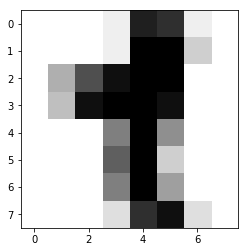

In [70]:
plt.imshow(digits.images[80],cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()

In [108]:
import numpy as np

In [119]:
clf=svm.SVC(kernel='linear',C=5)
indices=np.arange(digits.data.shape[0])
x_train,x_test,y_train,y_test,indexTrain,indexTest=cv.train_test_split(digits.data,digits.target,indices)


In [120]:

clf.fit(x_train,y_train)   # error due to 2-d dimension features corrsponding to each image
predictions=clf.predict(x_test)
clf.score(x_test,y_test)


0.97999999999999998

In [121]:
digits.data.shape

(1797, 64)

In [ ]:
# you can check by printing the images where it is predicting wrong

In [80]:
print(metrics.classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        44
          1       0.94      1.00      0.97        44
          2       1.00      1.00      1.00        43
          3       0.98      0.96      0.97        45
          4       0.98      0.98      0.98        50
          5       1.00      1.00      1.00        41
          6       1.00      1.00      1.00        42
          7       1.00      0.98      0.99        47
          8       0.96      0.98      0.97        47
          9       0.96      0.94      0.95        47

avg / total       0.98      0.98      0.98       450



In [82]:
print(metrics.confusion_matrix(y_test,predictions))

[[43  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  1  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  1]
 [ 0  1  0  0  0  0  0  0 46  0]
 [ 0  1  0  1  0  0  0  0  1 44]]


In [87]:
d=1/64
clf=svm.SVC(kernel='rbf',C=5,gamma=0.005)
x_train,x_test,y_train,y_test=cv.train_test_split(digits.data,digits.target)
clf.fit(x_train,y_train)   # error due to 2-d dimension features corrsponding to each image
predictions=clf.predict(x_test)
print(clf.score(x_test,y_test))
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))


0.968888888889
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        42
          1       1.00      1.00      1.00        50
          2       1.00      0.95      0.98        44
          3       1.00      0.97      0.99        38
          4       1.00      1.00      1.00        35
          5       1.00      0.98      0.99        48
          6       1.00      1.00      1.00        45
          7       1.00      0.96      0.98        47
          8       0.79      1.00      0.88        49
          9       0.98      0.90      0.94        52

avg / total       0.97      0.97      0.97       450

[[39  0  0  0  0  0  0  0  3  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  2  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 45  2  0]
 [ 0  0  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  5 47]]


In [122]:
y_test-predictions    # find those indeices where the predicted and the actual values dont match

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -4,  0,  0,  0,  0,  0,  0,  0,  0, -4,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  4,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [96]:
# plt.imshow(digits.images[80],cmap=plt.cm.gray_r,interpolation='nearest')   
# plt.show()

# need indices in place of 80

In [97]:
# to plot images where the actual and the predict do not match

predicted output
1
actual


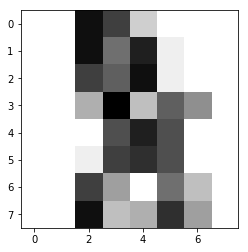

predicted output
9
actual


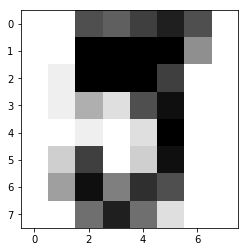

predicted output
7
actual


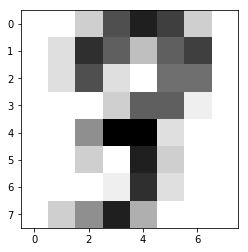

predicted output
9
actual


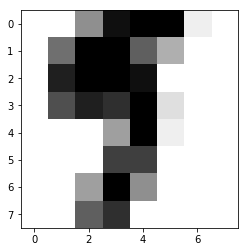

predicted output
0
actual


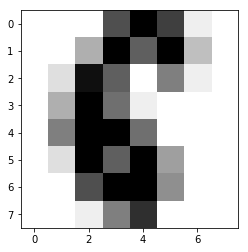

predicted output
5
actual


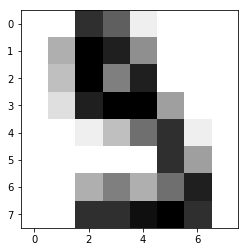

predicted output
1
actual


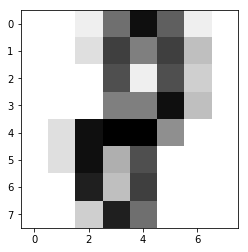

predicted output
3
actual


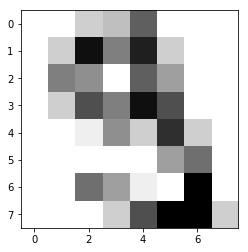

predicted output
5
actual


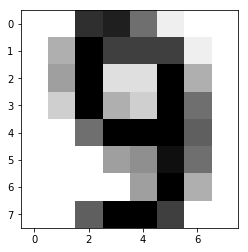

In [124]:
for i in range(y_test.shape[0]):# 360
    if y_test[i]-predictions[i]!=0:
        print('predicted output')
        print(predictions[i])
    
        print('actual')
        plt.imshow(digits.images[indexTest[i]],cmap=plt.cm.gray_r,interpolation='nearest')   
        plt.show()
    

In [ ]:
# or convert 64*1 matrix into 8*8 matrix to pass that array to print the image

In [128]:
df=pd.read_csv("glasses.csv")


In [130]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [132]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [134]:
 pd.isnull(df).sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [137]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [138]:
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

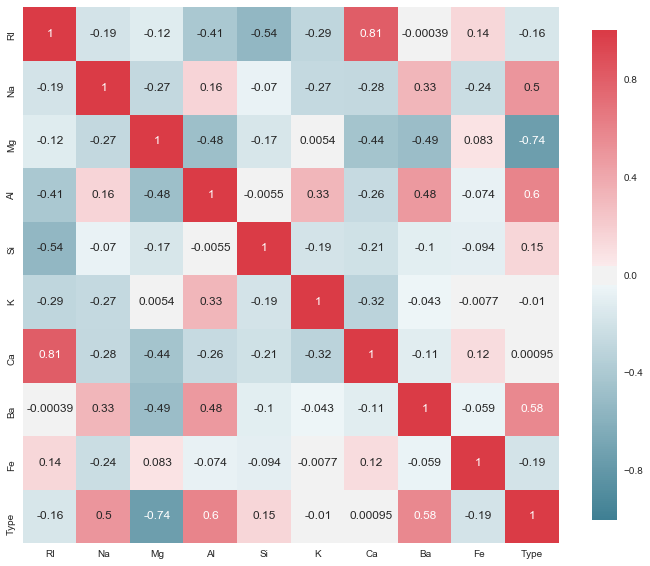

In [142]:
plot_correlation_map(df)
df.corr()
plt.show()

In [143]:
target=df['Type']

In [144]:
df.drop(['Type','Ca'],axis=1,inplace=True)

In [145]:
df.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0


In [160]:
x_train,x_test,y_train,y_test=cv.train_test_split(df,target,test_size=0.2)
clf=svm.SVC(kernel='linear',C=100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.58139534883720934

In [161]:
clf=svm.SVC(kernel='rbf',C=100)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.76744186046511631

In [ ]:
# try with different c and gamma values

# find cross_val_score